In [1]:
# Step 1: Install and import required libraries
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
sns.set_style("whitegrid")


In [2]:
# Step 2: Download TCS stock data
# NSE:TCS.NS | BSE:TCS.BO (we'll use NSE)

tcs = yf.download("TCS.NS", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))

# Show first few rows
tcs.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2018-01-01,1188.255981,1210.353855,1183.495009,1204.739552,1351760
2018-01-02,1181.787964,1199.035164,1176.847379,1194.723336,1920290
2018-01-03,1185.133911,1198.765477,1181.787810,1182.147147,1257120
2018-01-04,1193.420898,1195.621661,1185.740490,1190.231931,913082
2018-01-05,1207.838379,1212.464585,1190.231951,1190.231951,1153706


In [3]:
# 📌 Step 3: Basic info
tcs.info()
tcs.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1815 entries, 2018-01-01 to 2025-05-12
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   1815 non-null   float64
 1   (High, TCS.NS)    1815 non-null   float64
 2   (Low, TCS.NS)     1815 non-null   float64
 3   (Open, TCS.NS)    1815 non-null   float64
 4   (Volume, TCS.NS)  1815 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.1 KB


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03
mean,2829.191143,2857.514680,2801.775270,2830.076064,2.833670e+06
std,865.185707,871.180413,859.864045,865.291046,2.670374e+06
min,1181.787964,1195.621661,1176.847379,1182.147147,0.000000e+00
25%,1953.718689,1972.072328,1932.530226,1959.794719,1.733765e+06
50%,3055.325928,3075.544654,3030.677667,3054.995579,2.361000e+06
75%,3462.953857,3495.171776,3434.102596,3468.569497,3.268425e+06
max,4531.867676,4570.182670,4490.318390,4554.010849,8.806715e+07


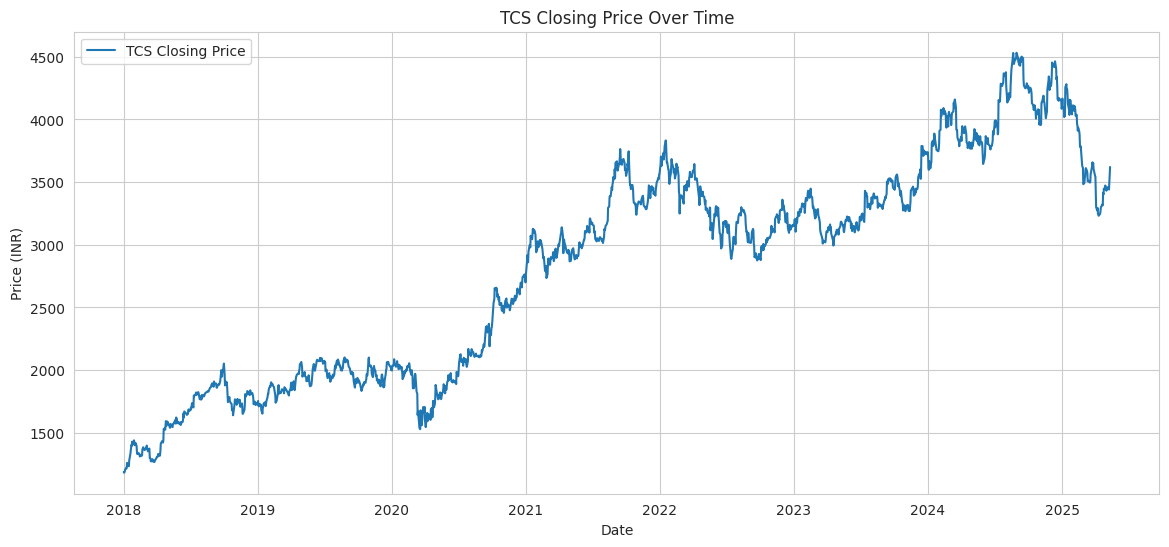

In [4]:
# Step 4: Plot Closing Price
plt.figure(figsize=(14,6))
plt.plot(tcs['Close'], label='TCS Closing Price')
plt.title('TCS Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


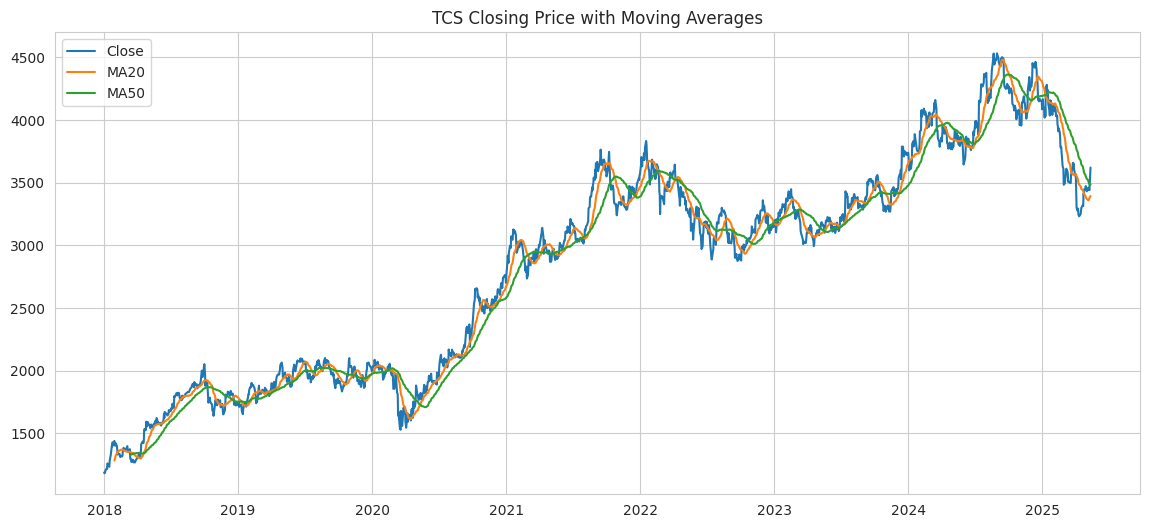

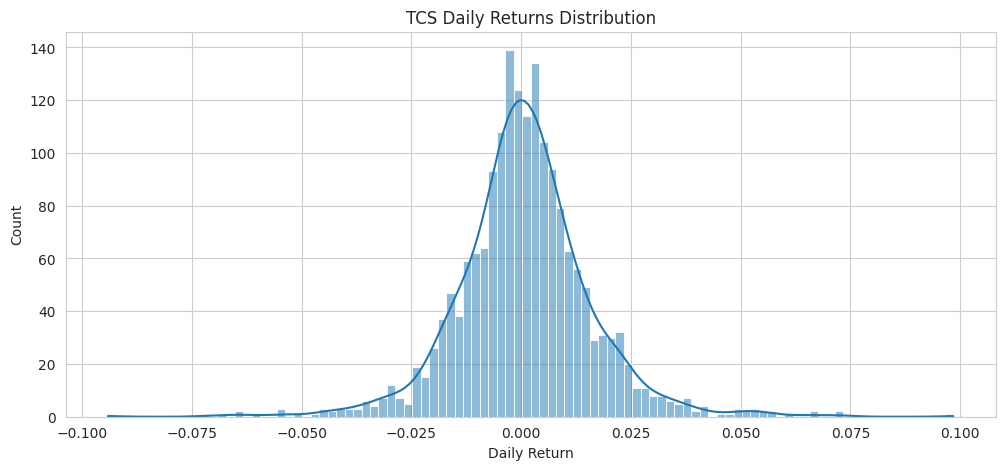

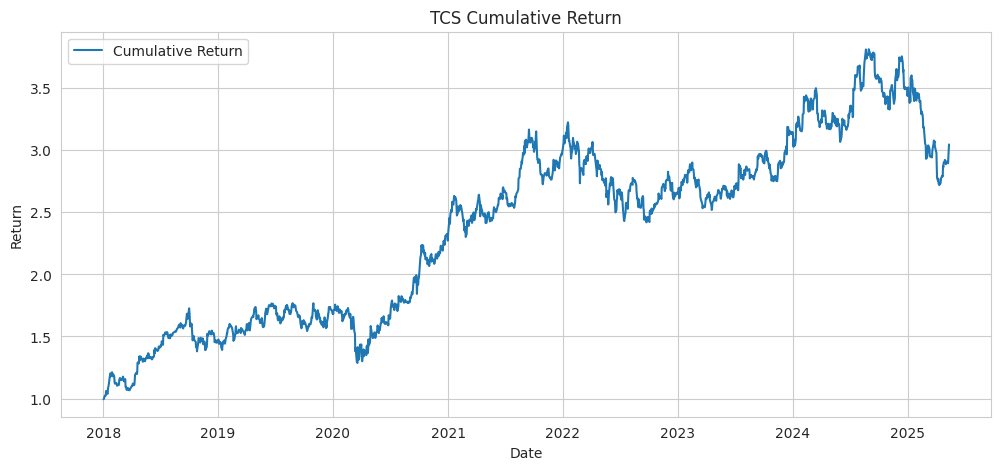

In [5]:
# Step 5: Moving Averages
tcs['MA20'] = tcs['Close'].rolling(20).mean()
tcs['MA50'] = tcs['Close'].rolling(50).mean()

plt.figure(figsize=(14,6))
plt.plot(tcs['Close'], label='Close')
plt.plot(tcs['MA20'], label='MA20')
plt.plot(tcs['MA50'], label='MA50')
plt.title('TCS Closing Price with Moving Averages')
plt.legend()
plt.show()

# Step 6: Daily Returns
tcs['Daily Return'] = tcs['Close'].pct_change()

plt.figure(figsize=(12,5))
sns.histplot(tcs['Daily Return'].dropna(), bins=100, kde=True)
plt.title('TCS Daily Returns Distribution')
plt.show()


#Step 7: Cumulative Returns
tcs['Cumulative Return'] = (1 + tcs['Daily Return']).cumprod()

plt.figure(figsize=(12,5))
plt.plot(tcs['Cumulative Return'], label='Cumulative Return')
plt.title('TCS Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()
